### Setup
There isn't much to do here, we'll provide the required imports and the read the pokemon CSV we'll be working with.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
df = pd.read_csv("Pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           1104 non-null   int64 
 1   Name        1104 non-null   object
 2   Type 1      1104 non-null   object
 3   Type 2      592 non-null    object
 4   Total       1104 non-null   int64 
 5   HP          1104 non-null   int64 
 6   Attack      1104 non-null   int64 
 7   Defense     1104 non-null   int64 
 8   Sp. Atk     1104 non-null   int64 
 9   Sp. Def     1104 non-null   int64 
 10  Speed       1104 non-null   int64 
 11  Generation  1104 non-null   int64 
 12  Legendary   1104 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 104.7+ KB


In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,503.437500,439.358696,70.655797,80.220109,74.507246,72.951993,72.000906,68.994565,4.640399
std,292.665209,119.710538,26.448074,32.103379,30.715728,32.415431,27.315772,29.724086,2.598249
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,254.750000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,3.000000
50%,492.500000,460.000000,68.000000,76.000000,70.000000,65.000000,70.000000,65.000000,4.000000
75%,749.250000,520.000000,85.000000,100.000000,90.250000,95.000000,90.000000,90.000000,7.000000
max,1025.000000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,9.000000


### Distribution of Pokemon Types:

<Axes: ylabel='count'>

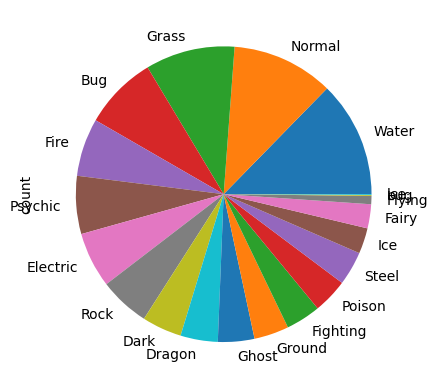

In [6]:
df['Type 1'].value_counts().plot(kind='pie')

### Distribution of Pokemon Totals:

<Axes: ylabel='Frequency'>

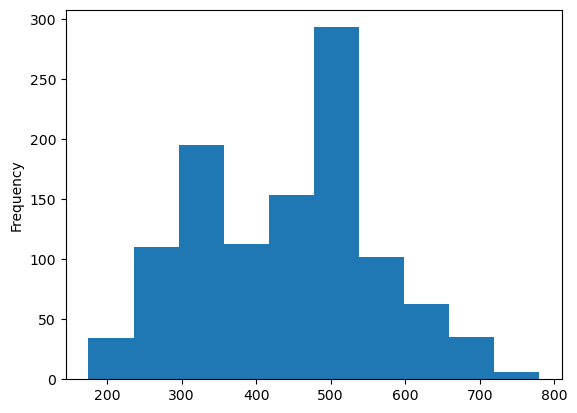

In [7]:
df['Total'].plot(kind='hist')

<Axes: >

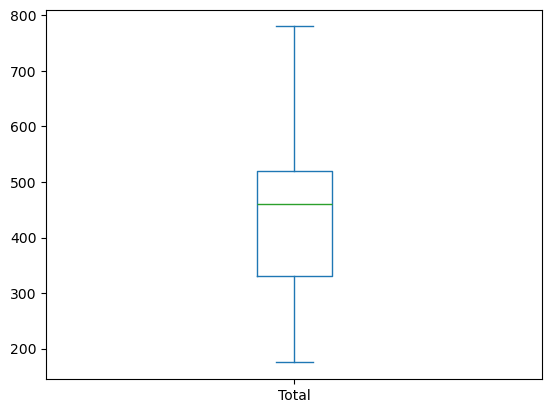

In [8]:
df['Total'].plot(kind='box')

### Distribution of Legendary Pokemons:

<Axes: ylabel='count'>

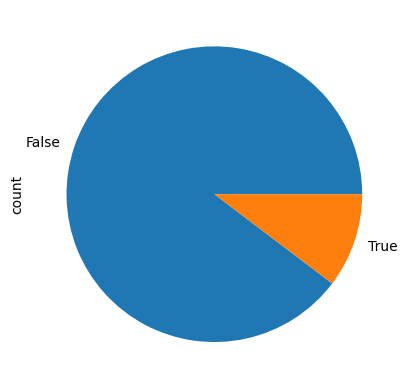

In [9]:
df['Legendary'].value_counts().plot(kind='pie')

### Basic filtering
Let's start with a few simple activities regarding filtering.

1. How many Pokemons exist with an Attack value greater than 150?

In [21]:
df.loc[df["Attack"]>150].shape[0]

19

2. Select all pokemons with a Speed of 10 or less

In [25]:
slow_pokemons_df = df.loc[df['Speed'] <= 10]
slow_pokemons_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
359,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
658,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
849,771,Pyukumuku,Water,NaN,410,55,60,130,30,130,5,7,False
907,829,Gossifleur,Grass,NaN,250,40,40,60,40,60,10,8,False


3. How many Pokemons have a Sp. Def value of 25 or less?

In [26]:
df.loc[df["Sp. Def"] <= 25].shape[0]

23

4. Select all the Legendary pokemons

In [29]:
legendary_df = df.loc[df['Legendary']]
legendary_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1021,Raging Bolt,Electric,Dragon,590,125,73,91,137,89,75,9,True
1100,1022,Iron Boulder,Rock,Dragon,590,90,120,80,68,108,124,9,True
1101,1023,Iron Crown,Steel,Psychic,590,90,72,100,122,108,98,9,True
1102,1024,Terapagos,Normal,NaN,700,160,105,110,130,110,85,9,True


### Advanced Selection
Now let's use boolean operators to create more advanced expressions

5. How many Fire-Flying Pokémon are there?

In [37]:
(df["Type 1"] == "Fire").sum()

70

In [38]:
(df["Type 2"] == "Flying").sum()

110

In [39]:
((df["Type 1"] == "Fire") & (df["Type 2"] == "Flying")).sum()

7

6. How many 'Poison' pokemons are across both types?

In [40]:
(df["Type 1"] == "Poison").sum()

42

In [41]:
(df["Type 2"] == "Poison").sum()

44

In [42]:
((df["Type 1"] == "Poison") | (df["Type 2"] == "Poison")).sum()# Try your code here

86

7. Name the pokemon of Type 1 Ice which has the strongest defense?

In [43]:
df[df["Type 1"] == "Ice"].sort_values(["Defense"], ascending=False).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


8. What's the most common type of Legendary Pokemons?

In [44]:
df[df["Legendary"] == True].value_counts(["Type 1"])

Type 1  
Psychic     21
Dragon      13
Electric     9
Steel        9
Grass        8
Fire         7
Poison       7
Rock         6
Ground       5
Water        5
Fighting     5
Normal       4
Dark         3
Ice          3
Ghost        3
Fairy        3
Flying       2
Bug          1
Name: count, dtype: int64

9. What's the most powerful pokemon of type water?

In [51]:
df[df["Type 1"] == "Water"].sort_values(["Total"],ascending=False).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True


10. What's the most powerful Dragon type pokemon?

In [50]:
df[df["Type 1"] == "Dragon"].sort_values(['Total'], ascending=False).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


11. Select most powerful Fire-type pokemon

In [57]:
powerful_fire_df = df.query("`Type 1` == 'Fire' and Attack > 100")
powerful_fire_df.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False


12. Select all Water-type, Flying-type pokemons

In [58]:
water_flying_df = df.query("`Type 1` == 'Water' and `Type 2` == 'Flying'")
water_flying_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
140,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
244,226,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
301,278,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
302,279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
508,458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False
641,580,Ducklett,Water,Flying,305,62,44,50,44,50,55,5,False
642,581,Swanna,Water,Flying,473,75,87,63,87,63,98,5,False


13. Select specific columns of Legendary pokemons of type Fire

In [60]:
legendary_fire_df = df.loc[
    df['Legendary'] & (df['Type 1'] == 'Fire'),  # Condition (or index-level)
    ['Name', 'Attack', 'Generation']             # Columns
]
legendary_fire_df

,Name,Attack,Generation
158,Moltres,100,1
263,Entei,115,2
270,Ho-oh,130,2
542,Heatran,90,4
799,Volcanion,110,6
884,Blacephalon,127,7
1098,Gouging Fire,115,9


### The End!